# Kaggle Tutorial
## Steps

### Read data
### EDA - Exploratory Data Analysis
### Preprocessare
### Model fit
### Model Validation
### Metrics

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
np.array([1, 2, 3])

array([1, 2, 3])

## Read Data

In [5]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [6]:
train_data.tail(5)

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [7]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [8]:
test_data.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [9]:
print(f"% of people who survived: {sum(train_data['Survived']) / len(train_data) * 100:.2f}%")

% of people who survived: 38.38%


In [10]:
sum(train_data.loc[train_data['Sex']=='male']['Survived']) / len(train_data.loc[train_data['Sex']=='male'])

0.18890814558058924

In [11]:
sum(train_data.loc[train_data['Sex']=='female']['Survived']) / len(train_data.loc[train_data['Sex']=='female'])

0.7420382165605095

In [12]:
train_data.loc[train_data['Sex']=='male']

PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1      0         A/5 21171   7.2500   NaN        S  
4    35.0      0      0            373450   8.0500   NaN        S  
5     NaN      0      0            330877   8.4583   NaN        Q  
6    54.0      0      0             17463  51.8625   E46        S  
7     2.0      3      1            349909  21.0750   NaN        S  
..    ...    ...    ...               ...      ...   ...      ...  
883  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
886  27.0      0      0            211536  13.0000   NaN        S  
889  26.0      0      0            111369  30.0000  C148        C  
890  32.0      0      0            370376   7.7500   NaN        Q  

[577 rows x 12 columns]

In [13]:
print(f"% of male {len(train_data.loc[train_data['Sex']=='male']) / len(train_data) * 100:.2f}%")

% of male 64.76%


## EDA - Exploratory Data Analysis

## Visualize analytics for all features

In [14]:
!pip install ydata-profiling 

In [15]:
from ydata_profiling import ProfileReport

In [16]:
report = ProfileReport(train_data, title="Titanic Train Report", correlations = {
    "pearson": {"calculate": True},
    "spearman": {"calculate": True},
    "kendall": {"calculate": False},
  },)

In [17]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
train_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

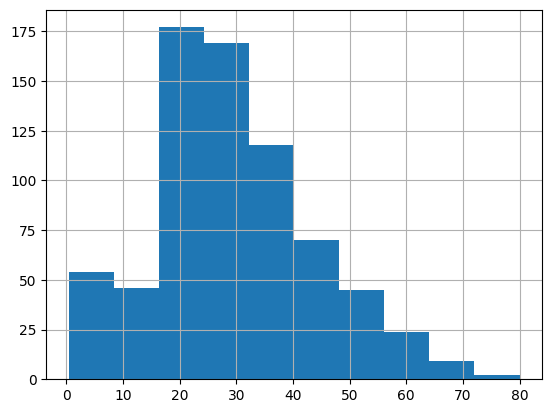

In [19]:
train_data['Age'].hist();

## Create a new feature FamilySize

In [20]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

In [21]:
train_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           1  
2      0  STON/O2. 3101282   7.9250   NaN        S           0  
3      0            113803  53.1000  C123        S           1  
4      0            373450   8.0500   NaN        S           0

### All changes or new features in training data must reflect in test data

In [22]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

In [23]:
test_data.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  FamilySize  
0  34.5      0      0   330911   7.8292   NaN        Q           0  
1  47.0      1      0   363272   7.0000   NaN        S           1  
2  62.0      0      0   240276   9.6875   NaN        Q           0  
3  27.0      0      0   315154   8.6625   NaN        S           0  
4  22.0      1      1  3101298  12.2875   NaN        S           2

## Extract Title component from Name feature

### Any change to be persistent must be assigned to the dataframe
### Changes are not in place

In [24]:
train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [25]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [26]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  FamilySize Title  
0        0         A/5 21171   7.2500   NaN        S           1    Mr  
1        0          PC 17599  71.2833   C85        C           1   Mrs  
2        0  STON/O2. 3101282   7.9250   NaN        S           0  Miss  
3        0            113803  53.1000  C123        S           1   Mrs  
4        0            373450   8.0500   NaN        S           0    Mr  
..     ...               ...      ...   ...      ...         ...   ...  
886      0            211536  13.0000   NaN        S           0   Rev  
887      0            112053  30.0000   B42        S           0  Miss  
888      2        W./C. 6607  23.4500   NaN        S           3  Miss  
889      0            111369  30.0000  C148        C           0    Mr  
890      0            370376   7.7500   NaN        Q           0    Mr  

[891 rows x 14 columns]

In [27]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_data['Title'] = test_data['Title'].replace(['Mlle', 'Ms'], 'Miss')

train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

In [28]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  FamilySize Title  
0        0         A/5 21171   7.2500   NaN        S           1    Mr  
1        0          PC 17599  71.2833   C85        C           1   Mrs  
2        0  STON/O2. 3101282   7.9250   NaN        S           0  Miss  
3        0            113803  53.1000  C123        S           1   Mrs  
4        0            373450   8.0500   NaN        S           0    Mr  
..     ...               ...      ...   ...      ...         ...   ...  
886      0            211536  13.0000   NaN        S           0  Rare  
887      0            112053  30.0000   B42        S           0  Miss  
888      2        W./C. 6607  23.4500   NaN        S           3  Miss  
889      0            111369  30.0000  C148        C           0    Mr  
890      0            370376   7.7500   NaN        Q           0    Mr  

[891 rows x 14 columns]

## Memorize test data IDs for the sumbission data frame

In [29]:
test_ids = test_data['PassengerId']

In [30]:
test_ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

## Drop unnecessary columns from the model

### Once again, changes are not persistent and must be assigned to the original dataframe

In [31]:
train_data.drop(["Ticket", "Name", "PassengerId", "SibSp", "Parch"], axis=1)

Survived  Pclass     Sex   Age     Fare Cabin Embarked  FamilySize Title
0           0       3    male  22.0   7.2500   NaN        S           1    Mr
1           1       1  female  38.0  71.2833   C85        C           1   Mrs
2           1       3  female  26.0   7.9250   NaN        S           0  Miss
3           1       1  female  35.0  53.1000  C123        S           1   Mrs
4           0       3    male  35.0   8.0500   NaN        S           0    Mr
..        ...     ...     ...   ...      ...   ...      ...         ...   ...
886         0       2    male  27.0  13.0000   NaN        S           0  Rare
887         1       1  female  19.0  30.0000   B42        S           0  Miss
888         0       3  female   NaN  23.4500   NaN        S           3  Miss
889         1       1    male  26.0  30.0000  C148        C           0    Mr
890         0       3    male  32.0   7.7500   NaN        Q           0    Mr

[891 rows x 9 columns]

In [32]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  FamilySize Title  
0        0         A/5 21171   7.2500   NaN        S           1    Mr  
1        0          PC 17599  71.2833   C85        C           1   Mrs  
2        0  STON/O2. 3101282   7.9250   NaN        S           0  Miss  
3        0            113803  53.1000  C123        S           1   Mrs  
4        0            373450   8.0500   NaN        S           0    Mr  
..     ...               ...      ...   ...      ...         ...   ...  
886      0            211536  13.0000   NaN        S           0  Rare  
887      0            112053  30.0000   B42        S           0  Miss  
888      2        W./C. 6607  23.4500   NaN        S           3  Miss  
889      0            111369  30.0000  C148        C           0    Mr  
890      0            370376   7.7500   NaN        Q           0    Mr  

[891 rows x 14 columns]

In [33]:
def drop_unnecessary_columns(data):
    data = data.drop(["Ticket", "Name", "PassengerId", "SibSp", "Parch"], axis=1)
    return data

train_data = drop_unnecessary_columns(train_data)
test_data = drop_unnecessary_columns(test_data)

In [34]:
train_data

Survived  Pclass     Sex   Age     Fare Cabin Embarked  FamilySize Title
0           0       3    male  22.0   7.2500   NaN        S           1    Mr
1           1       1  female  38.0  71.2833   C85        C           1   Mrs
2           1       3  female  26.0   7.9250   NaN        S           0  Miss
3           1       1  female  35.0  53.1000  C123        S           1   Mrs
4           0       3    male  35.0   8.0500   NaN        S           0    Mr
..        ...     ...     ...   ...      ...   ...      ...         ...   ...
886         0       2    male  27.0  13.0000   NaN        S           0  Rare
887         1       1  female  19.0  30.0000   B42        S           0  Miss
888         0       3  female   NaN  23.4500   NaN        S           3  Miss
889         1       1    male  26.0  30.0000  C148        C           0    Mr
890         0       3    male  32.0   7.7500   NaN        Q           0    Mr

[891 rows x 9 columns]

## Split data in train validation

In [35]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

In [36]:
X

Pclass     Sex   Age     Fare Cabin Embarked  FamilySize Title
0         3    male  22.0   7.2500   NaN        S           1    Mr
1         1  female  38.0  71.2833   C85        C           1   Mrs
2         3  female  26.0   7.9250   NaN        S           0  Miss
3         1  female  35.0  53.1000  C123        S           1   Mrs
4         3    male  35.0   8.0500   NaN        S           0    Mr
..      ...     ...   ...      ...   ...      ...         ...   ...
886       2    male  27.0  13.0000   NaN        S           0  Rare
887       1  female  19.0  30.0000   B42        S           0  Miss
888       3  female   NaN  23.4500   NaN        S           3  Miss
889       1    male  26.0  30.0000  C148        C           0    Mr
890       3    male  32.0   7.7500   NaN        Q           0    Mr

[891 rows x 8 columns]

In [37]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Stratify assures train and validation have same percent of 0 and 1 on the Survived target feature

In [39]:
sum(y_train) / len(y_train)

0.38342696629213485

In [40]:
sum(y_val) / len(y_val)

0.3854748603351955

In [41]:
sum(train_data['Survived']) / len(train_data)

0.3838383838383838

In [42]:
pd.isna(X_train['Age'])

692     True
481     True
527     True
855    False
801    False
       ...  
359     True
258    False
736    False
462    False
507     True
Name: Age, Length: 712, dtype: bool

In [43]:
X_train['Age']

692     NaN
481     NaN
527     NaN
855    18.0
801    31.0
       ... 
359     NaN
258    35.0
736    48.0
462    47.0
507     NaN
Name: Age, Length: 712, dtype: float64

## Data imputation - For missing data replace missing data with median per specific data distribution

### Example: Age median based on Sex and Pclass

In [44]:
X_train.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         35.0
        2         29.0
        3         21.5
male    1         40.0
        2         30.0
        3         26.0
Name: Age, dtype: float64

In [45]:
print("Yes") if 1 == 1 else print("No")

Yes


In [46]:
X_train['Age'].fillna(X_train['Age'].median())

692    28.5
481    28.5
527    28.5
855    18.0
801    31.0
       ... 
359    28.5
258    35.0
736    48.0
462    47.0
507    28.5
Name: Age, Length: 712, dtype: float64

In [47]:
# Compute median Age for each (Sex, Pclass) group from training data
age_medians = X_train.groupby(['Sex', 'Pclass'])['Age'].median()

# Fill missing Age values in train and test data using the training medians
X_train['Age'] = X_train.apply(lambda row: age_medians[row['Sex'], row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)
X_val['Age'] = X_val.apply(lambda row: age_medians[row['Sex'], row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)
test_data['Age'] = test_data.apply(lambda row: age_medians[row['Sex'], row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)


In [48]:
X_train.isnull().any()

Pclass        False
Sex           False
Age           False
Fare          False
Cabin          True
Embarked       True
FamilySize    False
Title         False
dtype: bool

In [49]:
X_train.groupby(['FamilySize', 'Pclass'])['Fare'].median()

FamilySize  Pclass
0           1          32.25000
            2          13.00000
            3           7.89580
1           1          77.00835
            2          26.00000
            3          14.45420
2           1          82.50830
            2          26.25000
            3          15.74170
3           1         135.77500
            2          39.00000
            3          19.91665
4           1         262.37500
            2          23.00000
            3          25.46670
5           1         263.00000
            2          18.75000
            3          29.12500
6           3          31.27500
7           3          46.90000
10          3          69.55000
Name: Fare, dtype: float64

In [50]:
# Compute median Fare for each (SibSp, Parch, Pclass) group from training data
fare_medians = X_train.groupby(['FamilySize', 'Pclass'])['Fare'].median()

# Fill missing Fare values in train and test data using the training medians
X_train['Fare'] = X_train.apply(lambda row: fare_medians[row['FamilySize'], row['Pclass']] if pd.isna(row['Fare']) else row['Fare'], axis=1)
X_val['Fare'] = X_val.apply(lambda row: fare_medians[row['FamilySize'], row['Pclass']] if pd.isna(row['Fare']) else row['Fare'], axis=1)
test_data['Fare'] = test_data.apply(lambda row: fare_medians[row['FamilySize'], row['Pclass']] if pd.isna(row['Fare']) else row['Fare'], axis=1)


In [51]:
X_train

Pclass     Sex   Age      Fare Cabin Embarked  FamilySize Title
692       3    male  26.0   56.4958   NaN        S           0    Mr
481       2    male  30.0    0.0000   NaN        S           0    Mr
527       1    male  40.0  221.7792   C95        S           0    Mr
855       3  female  18.0    9.3500   NaN        S           1   Mrs
801       2  female  31.0   26.2500   NaN        S           2   Mrs
..      ...     ...   ...       ...   ...      ...         ...   ...
359       3  female  21.5    7.8792   NaN        Q           0  Miss
258       1  female  35.0  512.3292   NaN        C           0  Miss
736       3  female  48.0   34.3750   NaN        S           4   Mrs
462       1    male  47.0   38.5000   E63        S           0    Mr
507       1    male  40.0   26.5500   NaN        S           0    Mr

[712 rows x 8 columns]

In [52]:
X_train

Pclass     Sex   Age      Fare Cabin Embarked  FamilySize Title
692       3    male  26.0   56.4958   NaN        S           0    Mr
481       2    male  30.0    0.0000   NaN        S           0    Mr
527       1    male  40.0  221.7792   C95        S           0    Mr
855       3  female  18.0    9.3500   NaN        S           1   Mrs
801       2  female  31.0   26.2500   NaN        S           2   Mrs
..      ...     ...   ...       ...   ...      ...         ...   ...
359       3  female  21.5    7.8792   NaN        Q           0  Miss
258       1  female  35.0  512.3292   NaN        C           0  Miss
736       3  female  48.0   34.3750   NaN        S           4   Mrs
462       1    male  47.0   38.5000   E63        S           0    Mr
507       1    male  40.0   26.5500   NaN        S           0    Mr

[712 rows x 8 columns]

In [53]:
def fill_missing_values_with_zero(data):
    cols = ['Cabin'] # 77% din date lipsa

    for col in cols:
        data[col] = data[col].fillna(0)
        data[col] = data[col].apply(lambda x: 1 if type(x) is str else 0)
        
    return data

def fill_missing_values_with_mode(train_data, validation_data, test_data):
    cols = ['Embarked'] # 2 date lipsa
    
    for col in cols:
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
        validation_data[col] = validation_data[col].fillna(train_data[col].mode()[0])
        test_data[col] = test_data[col].fillna(train_data[col].mode()[0])

    return train_data, validation_data, test_data


X_train = fill_missing_values_with_zero(X_train)
X_val = fill_missing_values_with_zero(X_val)
test_data = fill_missing_values_with_zero(test_data)

X_train, X_val, test_data = fill_missing_values_with_mode(X_train, X_val, test_data)


In [54]:
X_train

Pclass     Sex   Age      Fare  Cabin Embarked  FamilySize Title
692       3    male  26.0   56.4958      0        S           0    Mr
481       2    male  30.0    0.0000      0        S           0    Mr
527       1    male  40.0  221.7792      1        S           0    Mr
855       3  female  18.0    9.3500      0        S           1   Mrs
801       2  female  31.0   26.2500      0        S           2   Mrs
..      ...     ...   ...       ...    ...      ...         ...   ...
359       3  female  21.5    7.8792      0        Q           0  Miss
258       1  female  35.0  512.3292      0        C           0  Miss
736       3  female  48.0   34.3750      0        S           4   Mrs
462       1    male  47.0   38.5000      1        S           0    Mr
507       1    male  40.0   26.5500      0        S           0    Mr

[712 rows x 8 columns]

## Replace text/string from columns with labels

### female -> 0
### male -> 1

In [55]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [56]:
label_encoder#.transform

LabelEncoder()

### fit_transform - learns the labels and returns them
### transform - applies the learned labels

In [57]:


cols = {'Embarked', 'Title', 'Sex'}

for col in cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_val[col] = label_encoder.transform(X_val[col])
    test_data[col] = label_encoder.transform(test_data[col])
    print(label_encoder.classes_)

['C' 'Q' 'S']
['female' 'male']
['Master' 'Miss' 'Mr' 'Mrs' 'Rare']


In [58]:
(train_data.loc[train_data['Title']=='Master'])

Survived  Pclass   Sex    Age      Fare    Cabin Embarked  FamilySize  \
7           0       3  male   2.00   21.0750      NaN        S           4   
16          0       3  male   2.00   29.1250      NaN        Q           5   
50          0       3  male   7.00   39.6875      NaN        S           5   
59          0       3  male  11.00   46.9000      NaN        S           7   
63          0       3  male   4.00   27.9000      NaN        S           5   
65          1       3  male    NaN   15.2458      NaN        C           2   
78          1       2  male   0.83   29.0000      NaN        S           2   
125         1       3  male  12.00   11.2417      NaN        C           1   
159         0       3  male    NaN   69.5500      NaN        S          10   
164         0       3  male   1.00   39.6875      NaN        S           5   
165         1       3  male   9.00   20.5250      NaN        S           2   
171         0       3  male   4.00   29.1250      NaN        Q           5   
176         0       3  male    NaN   25.4667      NaN        S           4   
182         0       3  male   9.00   31.3875      NaN        S           6   
183         1       2  male   1.00   39.0000       F4        S           3   
193         1       2  male   3.00   26.0000       F2        S           2   
261         1       3  male   3.00   31.3875      NaN        S           6   
278         0       3  male   7.00   29.1250      NaN        Q           5   
305         1       1  male   0.92  151.5500  C22 C26        S           3   
340         1       2  male   2.00   26.0000       F2        S           2   
348         1       3  male   3.00   15.9000      NaN        S           2   
386         0       3  male   1.00   46.9000      NaN        S           7   
407         1       2  male   3.00   18.7500      NaN        S           2   
445         1       1  male   4.00   81.8583      A34        S           2   
480         0       3  male   9.00   46.9000      NaN        S           7   
489         1       3  male   9.00   15.9000      NaN        S           2   
549         1       2  male   8.00   36.7500      NaN        S           2   
709         1       3  male    NaN   15.2458      NaN        C           2   
751         1       3  male   6.00   12.4750     E121        S           1   
755         1       2  male   0.67   14.5000      NaN        S           2   
787         0       3  male   8.00   29.1250      NaN        Q           5   
788         1       3  male   1.00   20.5750      NaN        S           3   
802         1       1  male  11.00  120.0000  B96 B98        S           3   
803         1       3  male   0.42    8.5167      NaN        C           1   
819         0       3  male  10.00   27.9000      NaN        S           5   
824         0       3  male   2.00   39.6875      NaN        S           5   
827         1       2  male   1.00   37.0042      NaN        C           2   
831         1       2  male   0.83   18.7500      NaN        S           2   
850         0       3  male   4.00   31.2750      NaN        S           6   
869         1       3  male   4.00   11.1333      NaN        S           2   

      Title  
7    Master  
16   Master  
50   Master  
59   Master  
63   Master  
65   Master  
78   Master  
125  Master  
159  Master  
164  Master  
165  Master  
171  Master  
176  Master  
182  Master  
183  Master  
193  Master  
261  Master  
278  Master  
305  Master  
340  Master  
348  Master  
386  Master  
407  Master  
445  Master  
480  Master  
489  Master  
549  Master  
709  Master  
751  Master  
755  Master  
787  Master  
788  Master  
802  Master  
803  Master  
819  Master  
824  Master  
827  Master  
831  Master  
850  Master  
869  Master

In [59]:
(X_train['FamilySize'] == 0).astype(int)

692    1
481    1
527    1
855    0
801    0
      ..
359    1
258    1
736    0
462    1
507    1
Name: FamilySize, Length: 712, dtype: int64

## Create new feature - IsAlone
### Single people on Titanic have lower survival rate

In [60]:
X_train['IsAlone'] = (X_train['FamilySize'] == 0).astype(int)
X_val['IsAlone'] = (X_val['FamilySize'] == 0).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 0).astype(int)

In [61]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Title', 'IsAlone'],
      dtype='object')

## features list specifies the features on which the algorithm is applied

### We can remove some features to see how the metrics are changed: increase/decrease

In [62]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'FamilySize', 'Title', 'IsAlone']

from sklearn.metrics import accuracy_score, confusion_matrix

In [63]:
from sklearn.naive_bayes import GaussianNB


# Train GaussianNB on continuous features
gnb = GaussianNB()
gnb.fit(X_train[features], y_train) # fit = antrenare
gnb_probs = gnb.predict(X_train[features])

In [64]:
gnb_probs

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [65]:
# Evaluate performance
accuracy = accuracy_score(y_train, gnb_probs)
print(f"Naïve Bayes Train Accuracy: {accuracy:.4f}")

Naïve Bayes Train Accuracy: 0.7879


In [66]:
confusion_matrix(y_train, gnb_probs)

array([[361,  78],
       [ 73, 200]])

In [67]:
# Compute Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_train, gnb_probs).ravel()

# Compute FPR & FNR
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

False Positive Rate (FPR): 0.1777
False Negative Rate (FNR): 0.2674


In [68]:
gnb_probs_val = gnb.predict(X_val[features])

# Evaluate performance
accuracy_val = accuracy_score(y_val, gnb_probs_val)
print(f"Naïve Bayes Validation Accuracy: {accuracy_val:.4f}")

# Compute Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_val, gnb_probs_val).ravel()

# Compute FPR & FNR
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Naïve Bayes Validation Accuracy: 0.7654
False Positive Rate (FPR): 0.2182
False Negative Rate (FNR): 0.2609


In [69]:
test_data

Pclass  Sex   Age      Fare  Cabin  Embarked  FamilySize  Title  IsAlone
0         3    1  34.5    7.8292      0         1           0      2        1
1         3    0  47.0    7.0000      0         2           1      3        0
2         2    1  62.0    9.6875      0         1           0      2        1
3         3    1  27.0    8.6625      0         2           0      2        1
4         3    0  22.0   12.2875      0         2           2      3        0
..      ...  ...   ...       ...    ...       ...         ...    ...      ...
413       3    1  26.0    8.0500      0         2           0      2        1
414       1    0  39.0  108.9000      1         0           0      4        1
415       3    1  38.5    7.2500      0         2           0      2        1
416       3    1  26.0    8.0500      0         2           0      2        1
417       3    1  26.0   22.3583      0         0           2      0        0

[418 rows x 9 columns]

In [70]:
gnb_probs_test = gnb.predict(test_data[features])


In [71]:
gnb_probs_test

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [72]:
test_ids.values

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

## Write results into a new dataframe

In [73]:
result_df = pd.DataFrame({"PassengerId": test_ids.values})

In [74]:
result_df['Survived'] = gnb_probs_test

In [75]:
result_df.to_csv("NaiveBayes.csv", index=False)

## 1) Women first!

In [76]:
test_data['Survived'] = 0

In [77]:
test_data.loc[test_data['Sex'] == 1, "Survived"] = 1

In [78]:
test_data

Pclass  Sex   Age      Fare  Cabin  Embarked  FamilySize  Title  IsAlone  \
0         3    1  34.5    7.8292      0         1           0      2        1   
1         3    0  47.0    7.0000      0         2           1      3        0   
2         2    1  62.0    9.6875      0         1           0      2        1   
3         3    1  27.0    8.6625      0         2           0      2        1   
4         3    0  22.0   12.2875      0         2           2      3        0   
..      ...  ...   ...       ...    ...       ...         ...    ...      ...   
413       3    1  26.0    8.0500      0         2           0      2        1   
414       1    0  39.0  108.9000      1         0           0      4        1   
415       3    1  38.5    7.2500      0         2           0      2        1   
416       3    1  26.0    8.0500      0         2           0      2        1   
417       3    1  26.0   22.3583      0         0           2      0        0   

     Survived  
0           1  
1           0  
2           1  
3           1  
4           0  
..        ...  
413         1  
414         0  
415         1  
416         1  
417         1  

[418 rows x 10 columns]

## 2) Women and children first!

In [79]:
test_data['Survived'] = 0

In [80]:
test_data.loc[(test_data['Sex'] == 1) | (test_data['Age'] < 18), 'Survived'] = 1

In [81]:
test_data

Pclass  Sex   Age      Fare  Cabin  Embarked  FamilySize  Title  IsAlone  \
0         3    1  34.5    7.8292      0         1           0      2        1   
1         3    0  47.0    7.0000      0         2           1      3        0   
2         2    1  62.0    9.6875      0         1           0      2        1   
3         3    1  27.0    8.6625      0         2           0      2        1   
4         3    0  22.0   12.2875      0         2           2      3        0   
..      ...  ...   ...       ...    ...       ...         ...    ...      ...   
413       3    1  26.0    8.0500      0         2           0      2        1   
414       1    0  39.0  108.9000      1         0           0      4        1   
415       3    1  38.5    7.2500      0         2           0      2        1   
416       3    1  26.0    8.0500      0         2           0      2        1   
417       3    1  26.0   22.3583      0         0           2      0        0   

     Survived  
0           1  
1           0  
2           1  
3           1  
4           0  
..        ...  
413         1  
414         0  
415         1  
416         1  
417         1  

[418 rows x 10 columns]